In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


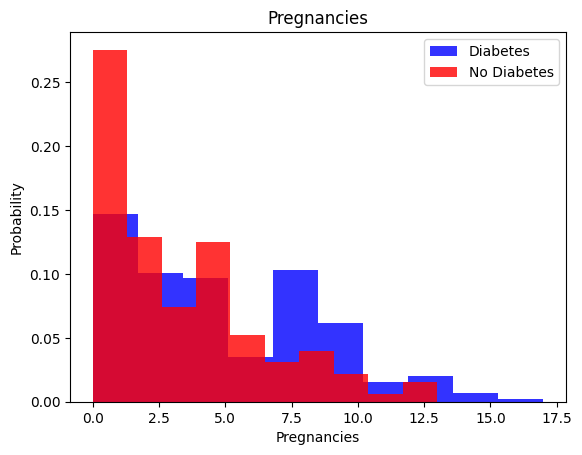

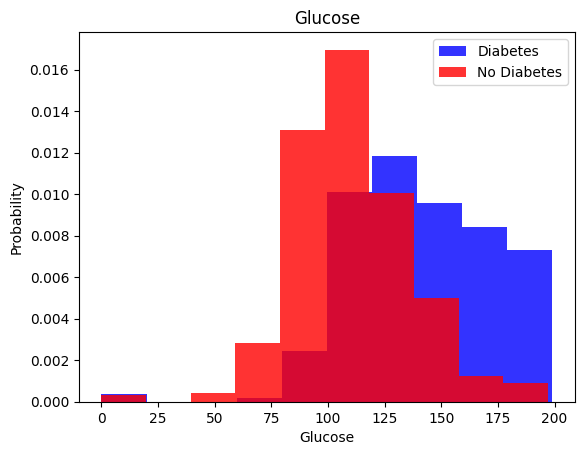

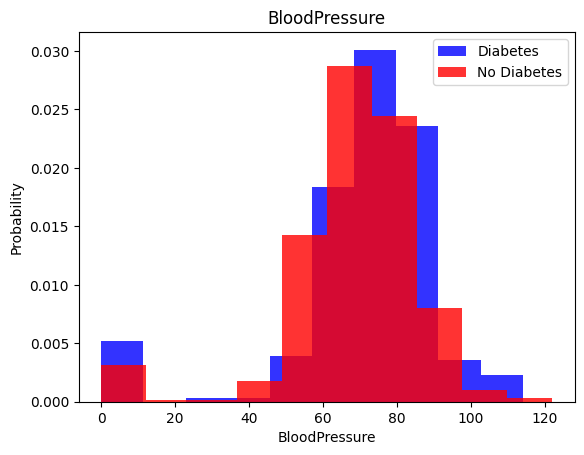

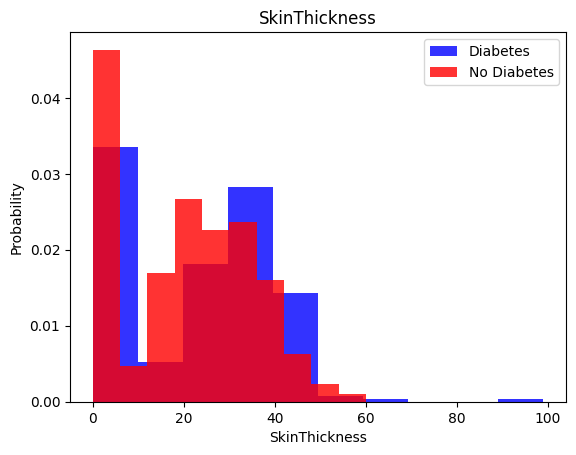

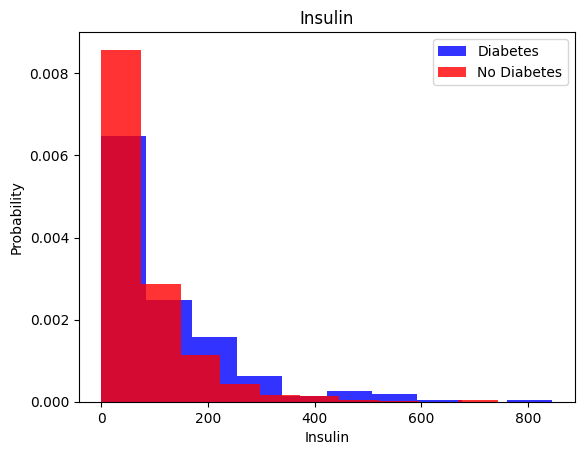

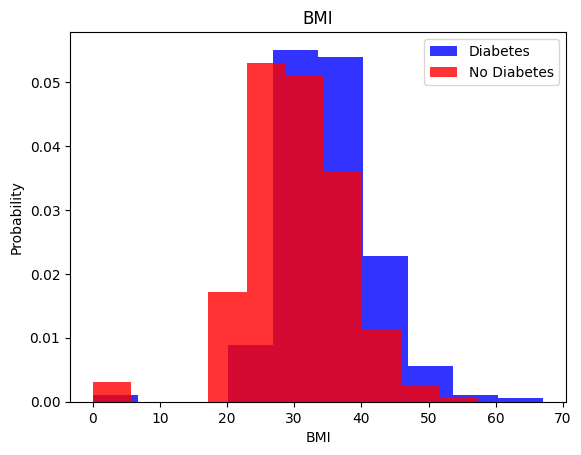

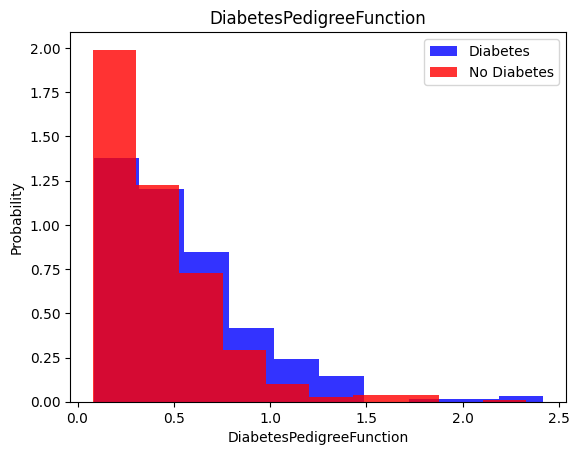

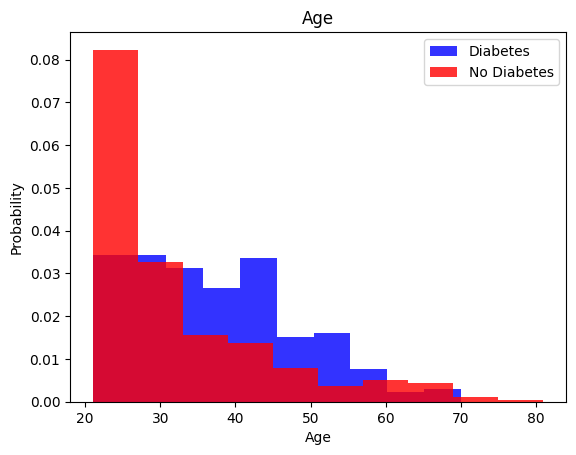

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"] == 1][label], color='blue', label="Diabetes", density=True, alpha=0.8)
  plt.hist(df[df["Outcome"] == 0][label], color='red', label="No Diabetes", density=True, alpha=0.8)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5103 - loss: 1.8267 - val_accuracy: 0.5519 - val_loss: 1.3249
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5357 - loss: 1.4210 - val_accuracy: 0.6623 - val_loss: 0.9062
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5846 - loss: 1.1045 - val_accuracy: 0.6039 - val_loss: 0.9354
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5766 - loss: 0.9913 - val_accuracy: 0.6753 - val_loss: 0.7517
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5699 - loss: 0.9726 - val_accuracy: 0.7208 - val_loss: 0.6912
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6318 - loss: 0.8184 - val_accuracy: 0.6948 - val_loss: 0.7055
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6689 - loss: 0.7854 - val_accuracy: 0.5455 - val_loss: 0.8120
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5843 - loss: 0.8488 - val_accuracy: 0.5974 - val_loss

We can scale our Features and Oversample an Outcome to match the frequency

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

**Scaled Features**

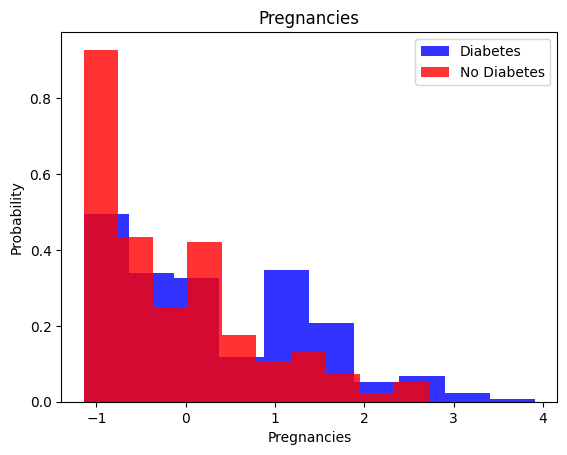

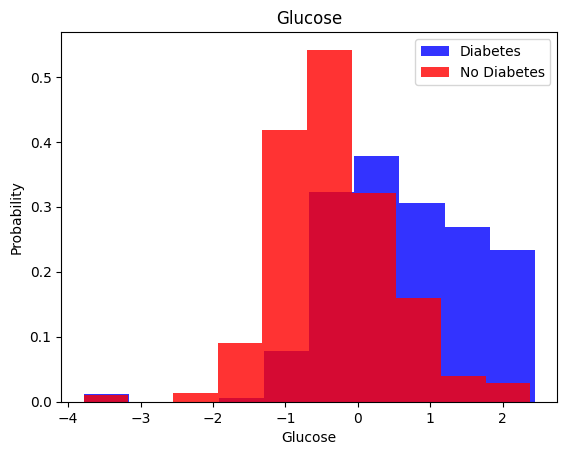

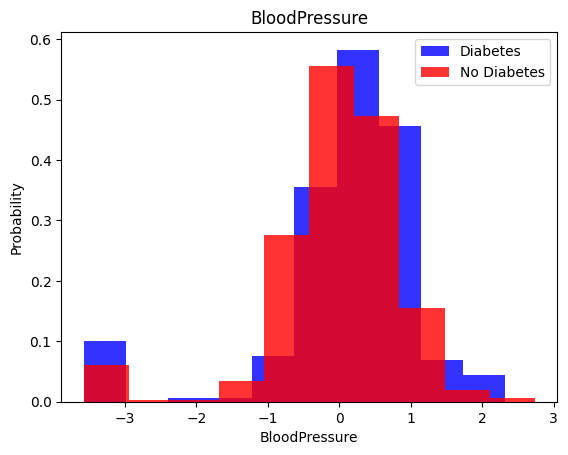

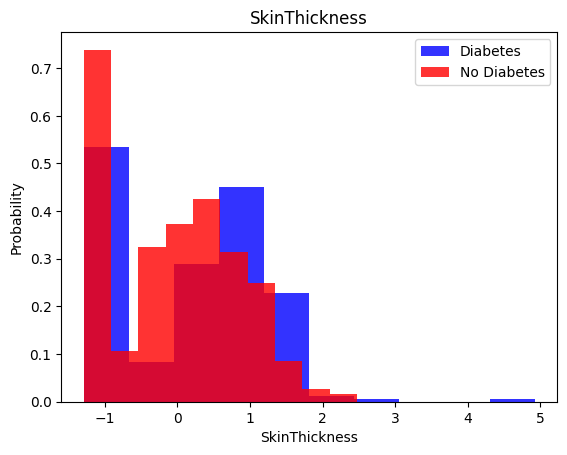

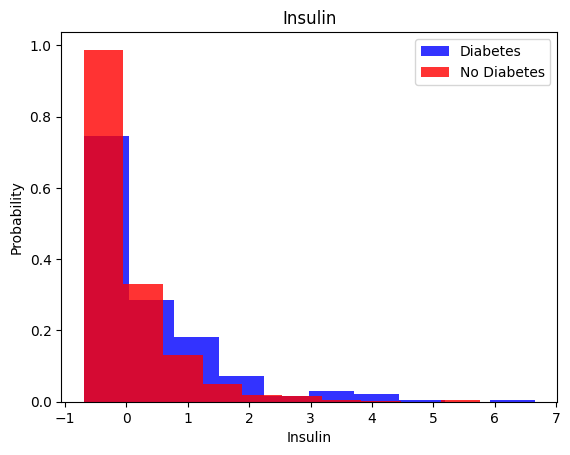

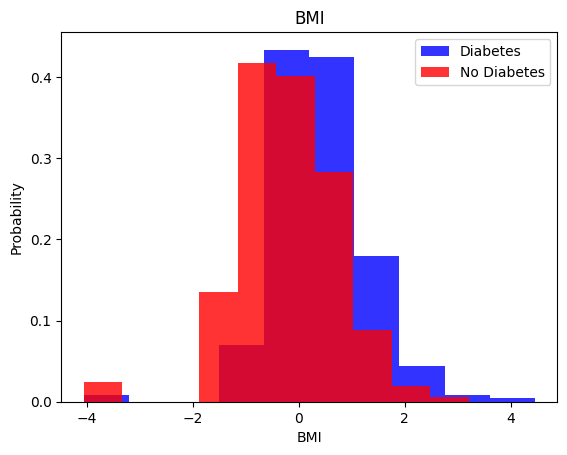

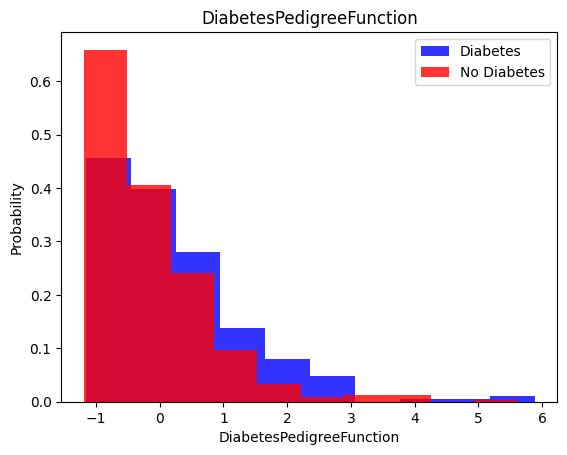

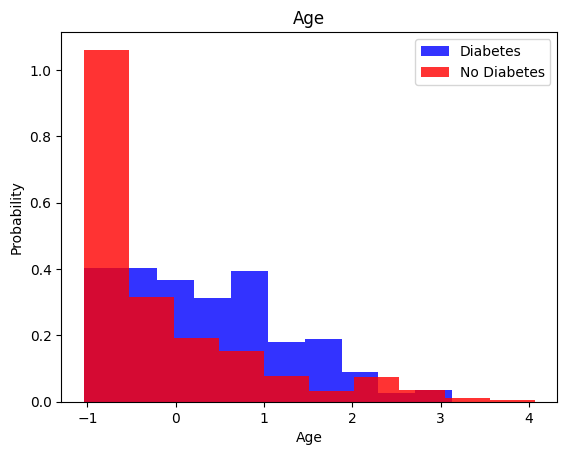

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"] == 1][label], color='blue', label="Diabetes", density=True, alpha=0.8)
  plt.hist(transformed_df[transformed_df["Outcome"] == 0][label], color='red', label="No Diabetes", density=True, alpha=0.8)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5756 - loss: 0.7212 - val_accuracy: 0.6200 - val_loss: 0.6613
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.6449 - val_accuracy: 0.7000 - val_loss: 0.5943
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7181 - loss: 0.5831 - val_accuracy: 0.7300 - val_loss: 0.5539
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5578 - val_accuracy: 0.7400 - val_loss: 0.5283
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.5634 - val_accuracy: 0.7600 - val_loss: 0.5131
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5432 - val_accuracy: 0.7650 - val_loss: 0.4996
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5566 - val_accuracy: 0.7700 - val_loss: 0.4911
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7607 - loss: 0.5296 - val_accuracy: 0.7700 - val_loss:

In [ ]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8033 - loss: 0.4248 


[0.4265948534011841, 0.8050000071525574]

**80.5% Accuracy**